# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

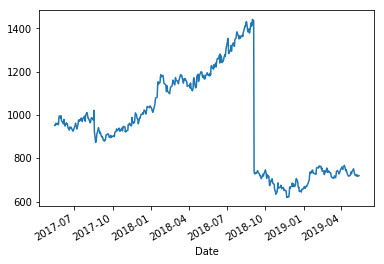

In [2]:
#Query 2.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('week2.csv')
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)
dataset.dtypes
dataset.index  = dataset.Date
# Plotting the data
dataset['Close Price'].plot()

<StemContainer object of 3 artists>

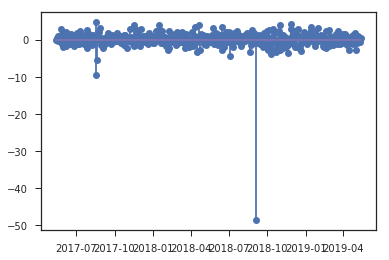

In [26]:
#Query 2.2
x = dataset['Pct_Change']
plt.stem(dataset.Date, x)

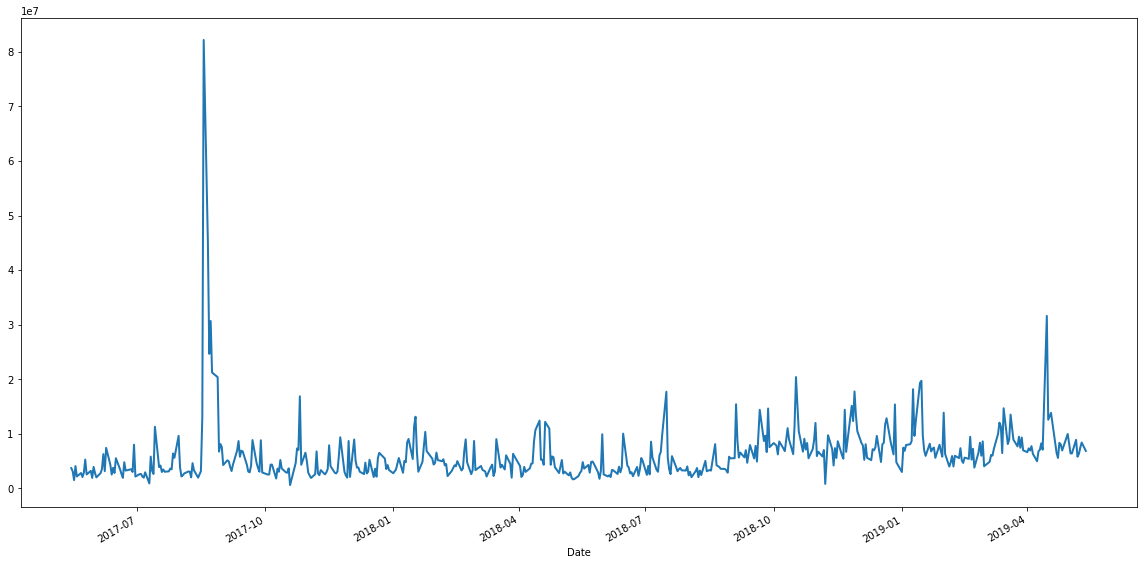

In [4]:
#Query 2.3
dataset['Total Traded Quantity'].plot(figsize = (20,10),lw=2)

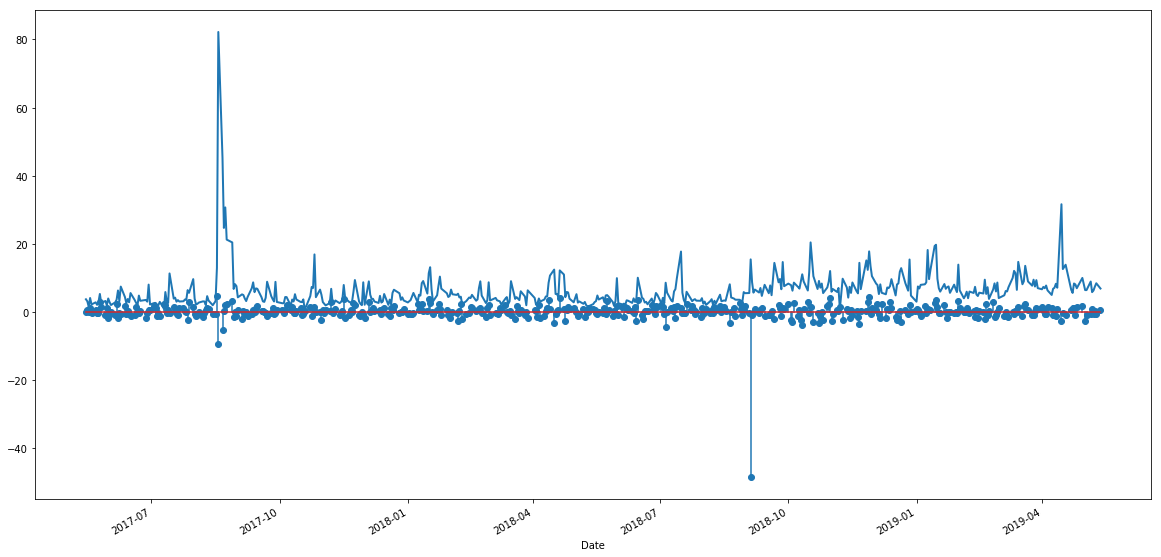

In [6]:
fig = plt.figure(figsize = (20,10))
plt.stem(dataset.Date, x)
(dataset['Total Traded Quantity']/1000000).plot(figsize = (20,10),lw=2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac458630>],
      dtype=object)

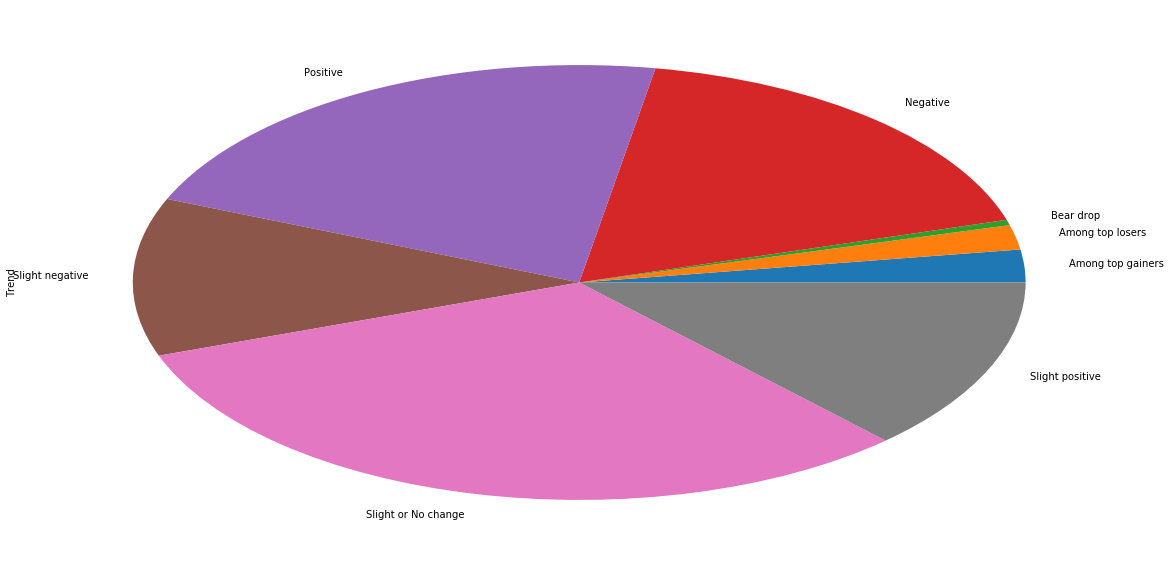

In [8]:
#Query 2.4
piedata = dataset.groupby('Trend').Trend.count()
piedata.plot.pie(subplots = True,figsize =(20,10))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eac3ef208>,
      dtype=object)

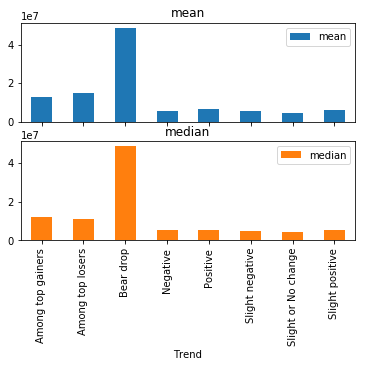

In [9]:
bardata = dataset.groupby('Trend')['Total Traded Quantity'].agg(['mean','median'])
bardata.plot.bar(subplots = True)

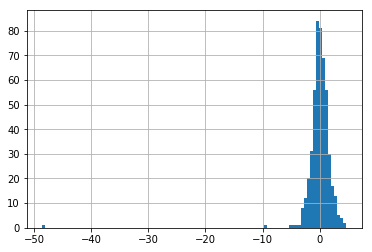

In [10]:
#Query 2.5
dataset.Pct_Change.hist(bins = 100)


/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462:

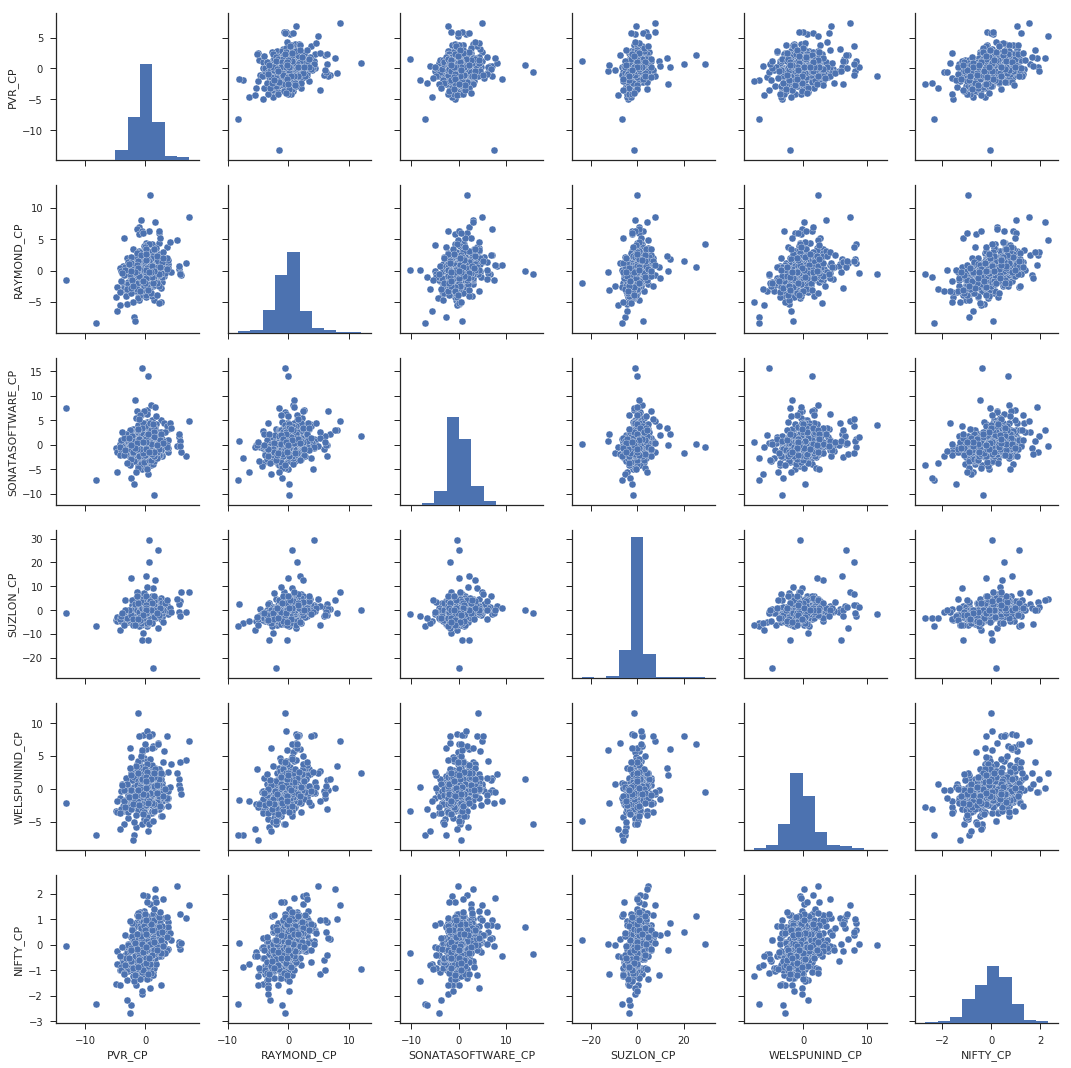

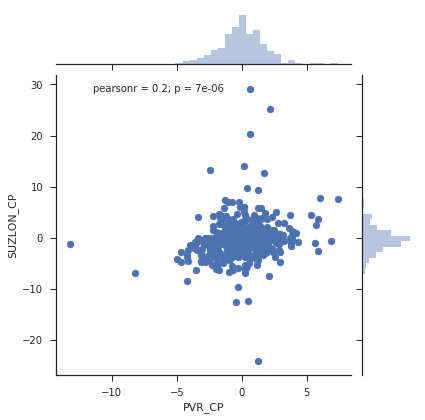

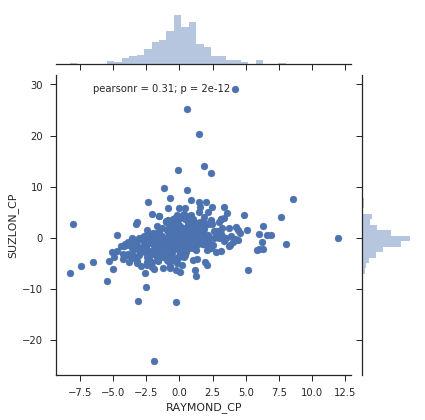

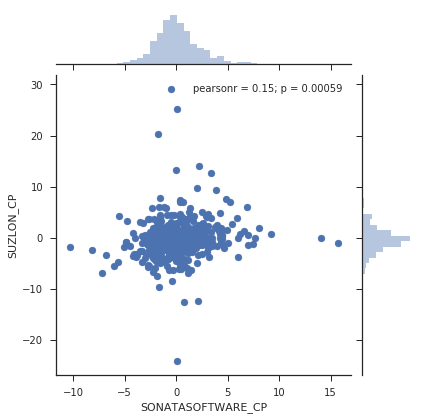

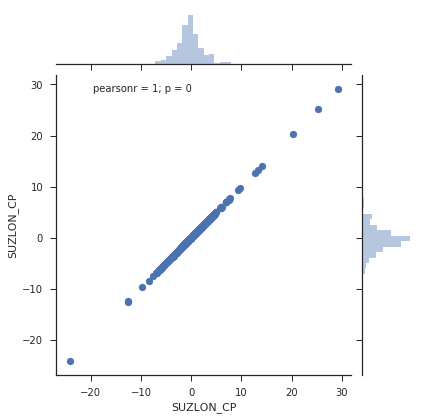

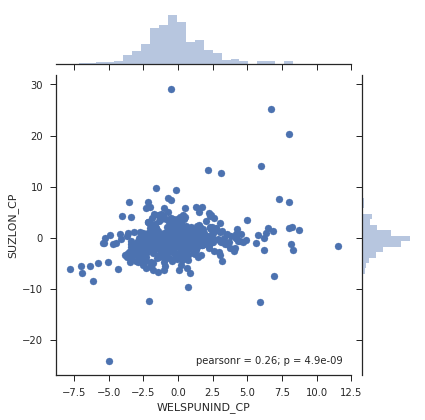

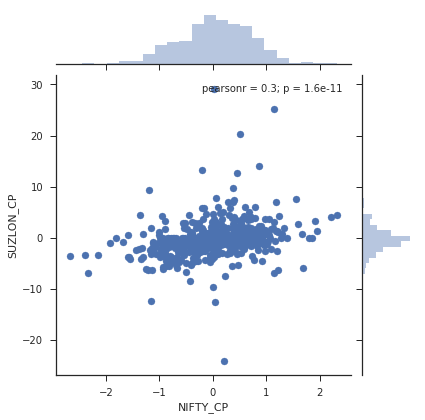

In [21]:
# Query 2.6
data1 = pd.read_csv('PVR.csv')
data2 = pd.read_csv('RAYMOND.csv')
data3 = pd.read_csv('SONATSOFTW.csv')
data4 = pd.read_csv('SUZLON.csv')
data5 = pd.read_csv('WELSPUNIND.csv')
dataindex = pd.read_csv('Nifty50.csv')
data1= data1[data1.Series == 'EQ']
data1.reset_index(inplace = True, drop = True)
data2= data2[data2.Series == 'EQ']
data2.reset_index(inplace = True, drop = True)
data3= data3[data3.Series == 'EQ']
data3.reset_index(inplace = True, drop = True)
data4= data4[data4.Series == 'EQ']
data4.reset_index(inplace = True, drop = True)
data5= data5[data5.Series == 'EQ']
data5.reset_index(inplace = True, drop = True)

datas = pd.DataFrame([data1['Close Price'], data2['Close Price'],data3['Close Price'],data4['Close Price'],data5['Close Price'], dataindex['Close']]).transpose()
datas.columns = ['PVR_CP','RAYMOND_CP','SONATASOFTWARE_CP','SUZLON_CP','WELSPUNIND_CP','NIFTY_CP']
dataspct = pd.DataFrame([(datas['PVR_CP'].pct_change())*100, (datas['RAYMOND_CP'].pct_change())*100,(datas['SONATASOFTWARE_CP'].pct_change())*100, (datas['SUZLON_CP'].pct_change())*100, (datas['WELSPUNIND_CP'].pct_change())*100,(datas['NIFTY_CP'].pct_change())*100]).transpose()
dataspct = dataspct.fillna(0)
import seaborn as sns; sns.set(style ="ticks", color_codes=True)
sns.pairplot(dataspct)
for i in dataspct.columns:
    sns.jointplot(i,'SUZLON_CP',dataspct,kind='scatter')

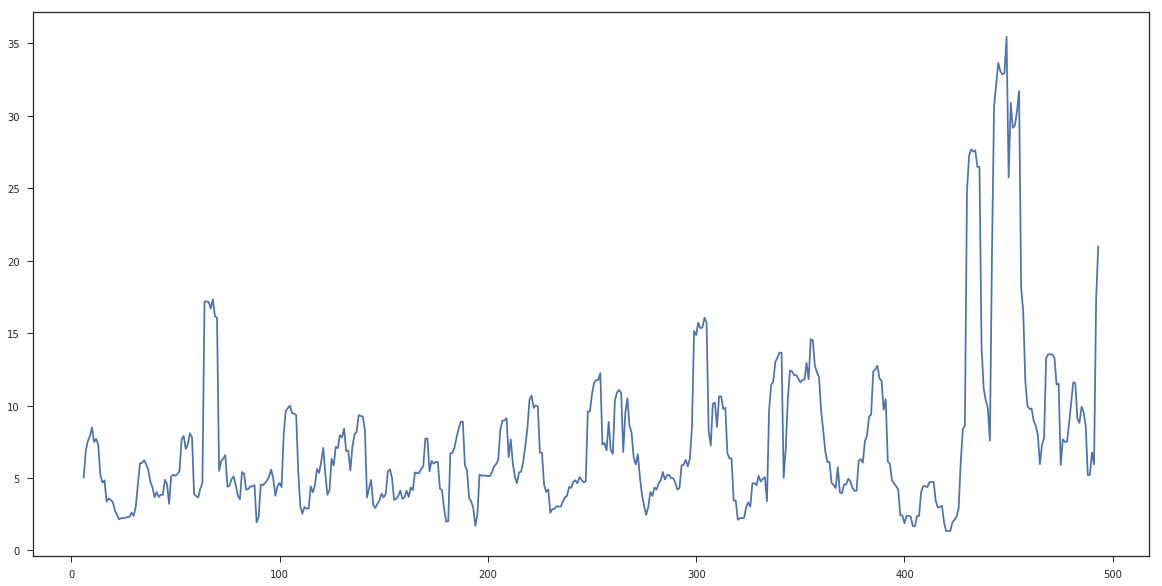

In [28]:
# Query 2.7
suzlon = dataspct['SUZLON_CP'].rolling(7).std() * np.sqrt(7)
suzlon.plot(figsize =(20,10))


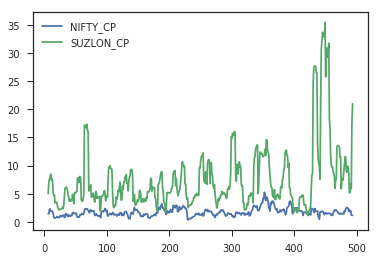

In [30]:
#Query 2.8
compare = dataspct[['NIFTY_CP','SUZLON_CP']]
vol = compare.rolling(7).std() * np.sqrt(7)
vol.plot()

In [31]:
#Query 2.9
signals = pd.DataFrame(index = dataset.index)
signals['signal'] = 0.0
signals['21_SMA'] = dataset['Close Price'].rolling(window = 21,min_periods =1).mean()
signals['34_SMA'] = dataset['Close Price'].rolling(window = 34,min_periods =1).mean()
signals['signal'][21:] = np.where(signals['21_SMA'][21:] > signals['34_SMA'][21:], 1.0,0.0)
signals['Positions'] = signals['signal'].diff()
print(signals)



            signal      21_SMA      34_SMA  Positions
Date                                                 
2017-05-15     0.0  951.550000  951.550000        NaN
2017-05-16     0.0  953.275000  953.275000        0.0
2017-05-17     0.0  953.116667  953.116667        0.0
2017-05-18     0.0  955.275000  955.275000        0.0
2017-05-19     0.0  955.810000  955.810000        0.0
2017-05-22     0.0  956.750000  956.750000        0.0
2017-05-23     0.0  956.828571  956.828571        0.0
2017-05-24     0.0  956.575000  956.575000        0.0
2017-05-25     0.0  959.544444  959.544444        0.0
2017-05-26     0.0  963.160000  963.160000        0.0
2017-05-29     0.0  965.159091  965.159091        0.0
2017-05-30     0.0  967.745833  967.745833        0.0
2017-05-31     0.0  968.461538  968.461538        0.0
2017-06-01     0.0  968.671429  968.671429        0.0
2017-06-02     0.0  968.723333  968.723333        0.0
2017-06-05     0.0  968.100000  968.100000        0.0
2017-06-06     0.0  968.7617

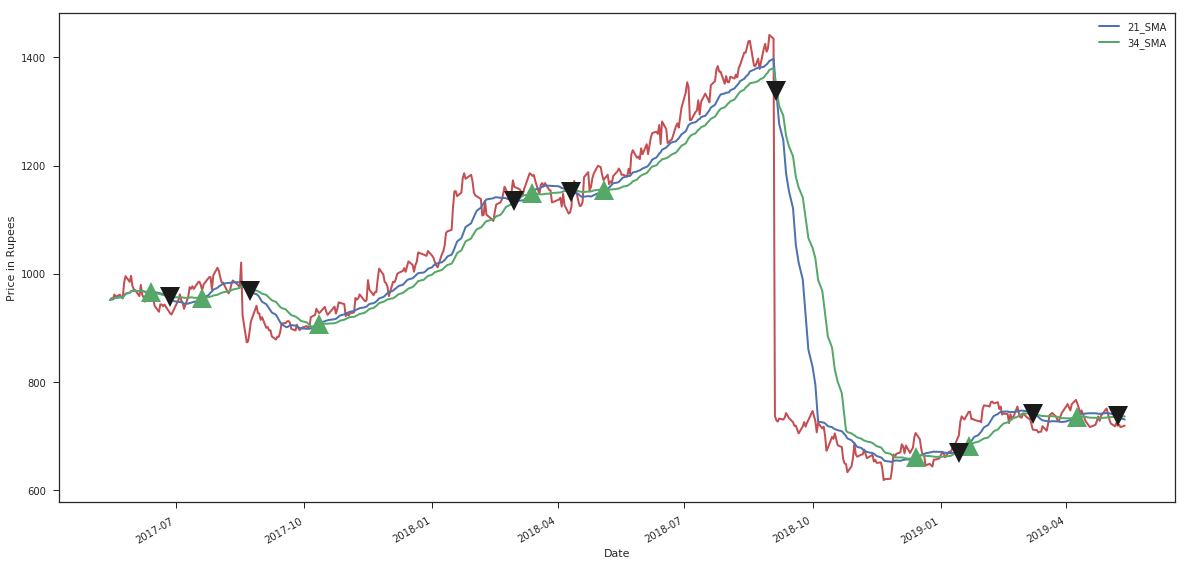

In [33]:
fig = plt.figure(figsize = (20,10))
a = fig.add_subplot(111, ylabel = 'Price in Rupees')
dataset['Close Price'].plot(ax = a, color = 'r' , lw=2)
signals[['21_SMA','34_SMA']].plot(ax = a,lw=2)
a.plot(signals.loc[signals.Positions ==1.0].index,signals['21_SMA'][signals.Positions ==1.0], '^',markersize = 20,color='g')
a.plot(signals.loc[signals.Positions ==-1.0].index,signals['21_SMA'][signals.Positions ==-1.0], 'v',markersize = 20,color='k')
plt.show()


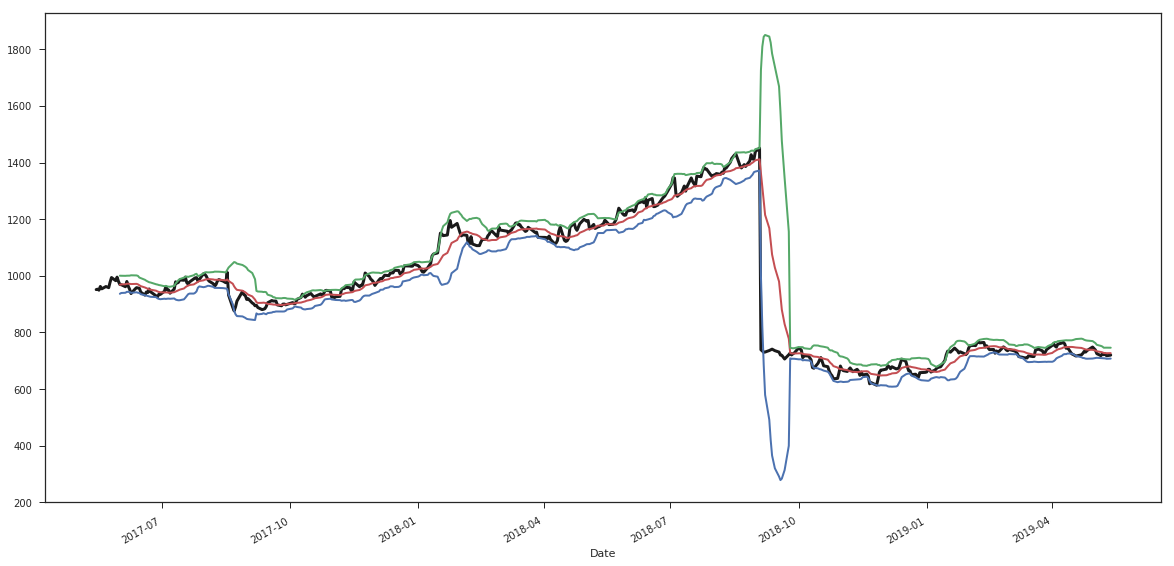

In [34]:
#Query 2.10
def bollinger(p):
    avg = p.rolling(14).mean()
    sd = p.rolling(14).std()
    ub = avg + (sd*2)
    db = avg - (sd*2)
    return  np.round(avg,3), np.round(ub,3), np.round(db,3)

dataset['avg'],dataset['upper'],dataset['lower'] = bollinger(dataset['Close Price'])

dataset['Average Price'].plot(c='k',figsize=(20,10),lw=3)
dataset['avg'].plot(c='r',figsize=(20,10),lw=2)
dataset['upper'].plot(c='g',figsize=(20,10),lw=2)
dataset['lower'].plot(c='b',figsize=(20,10),lw=2)


In [35]:
dataset.to_csv('week3.csv')